In [1]:
import os.path as op
import sys
sys.path.append(op.abspath('../'))

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import models
import var, fcts

from project import files, defs, col, normalize
from lib import data, plot as lp, bdt as lBDT

In [3]:
N = 100000
S = 100000
P = 100000


shift_pedestal = (600, 150)
amp_S = 30  # (25, 5)
std_N = 1.

# Peaked
n_peaks = (1, 6)  # between 1 and 6 peaks / event
amp_P = (1, 30)  # peak amplitude between 1 and 15
length_peaks = (1, 3)  # length of a peak between 1 and 3

shift_pedestal = (600, 150)

optimised = False

components = {
    "S": {"S": S, "amp_S": amp_S},
    "N": {"N": N, "std_N": std_N},
    "P": {
        "P": P, "n_peaks": n_peaks,
        "amp_P": amp_P, "length_peaks": length_peaks
    }
}

bdt_name = "BDT_SNP"

image_path = op.join(var.image_path, bdt_name)

In [4]:
rng = np.random.default_rng(12345)

dataframe = models.get_full_dataframe(
    components,
    shift_pedestal=shift_pedestal,
    random_time_shift=True,
    rng=rng
)


In [5]:
norm_df = normalize.normalise_df(dataframe)
norm_df

Time taken: 0.2667725086212158


s0        s1        s2        s3        s4        s5        s6  \
0     -0.083109  0.803389  0.803389 -0.083109 -0.083109  1.689887 -0.969607   
1     -0.250097 -0.250097  1.528368  1.528368  1.528368  0.639136 -0.250097   
2     -0.059293  0.320183 -0.059293  0.320183  3.735470  2.976517  1.079136   
3      0.231736 -0.592215  2.978239  4.076840  1.055687  0.231736 -0.317564   
4      0.079305  1.348188  0.079305  1.348188 -1.189577 -1.189577  0.079305   
...         ...       ...       ...       ...       ...       ...       ...   
99995 -0.258199 -0.258199 -0.258199 -0.258199 -0.258199 -0.258199 -0.258199   
99996  1.483240  1.483240  1.483240  1.483240 -0.674200 -0.674200 -0.674200   
99997 -0.529150 -0.529150 -0.529150 -0.529150 -0.529150 -0.529150 -0.529150   
99998 -0.179605 -0.179605 -0.179605 -0.179605 -0.179605 -0.179605 -0.179605   
99999 -0.258199 -0.258199 -0.258199 -0.258199 -0.258199 -0.258199 -0.258199   

             s7        s8        s9  ...       s28       s29       s30  \
0      0.803389  1.689887 -0.969607  ... -0.083109  0.803389 -0.083109   
1     -0.250097  0.639136 -0.250097  ... -0.250097  0.639136  0.639136   
2     -0.059293 -0.059293 -0.059293  ... -0.059293 -0.438769 -0.059293   
3     -0.866865 -0.592215 -0.317564  ... -0.042914 -0.042914  0.231736   
4     -1.189577  1.348188 -1.189577  ...  0.079305  1.348188  0.079305   
...         ...       ...       ...  ...       ...       ...       ...   
99995 -0.258199 -0.258199 -0.258199  ... -0.258199 -0.258199 -0.258199   
99996 -0.674200 -0.674200 -0.674200  ... -0.674200 -0.674200  1.483240   
99997 -0.529150  1.889822  1.889822  ... -0.529150 -0.529150 -0.529150   
99998 -0.179605 -0.179605 -0.179605  ... -0.179605 -0.179605 -0.179605   
99999 -0.258199 -0.258199 -0.258199  ... -0.258199 -0.258199 -0.258199   

            s31      amp_S  is_sig  is_noise  is_peaked    old_mean    old_std  
0     -0.969607   1.233789    True     False      False   562.09375   1.128034  
1     -0.250097   2.686911    True     False      False   563.28125   1.124566  
2     -0.438769  10.913840    True     False      False  1004.15625   2.635211  
3      0.231736  16.066059    True     False      False   569.15625   3.640994  
4     -1.189577   1.121716    True     False      False   746.93750   0.788095  
...         ...        ...     ...       ...        ...         ...        ...  
99995 -0.258199        NaN   False     False       True   639.62500   2.420615  
99996 -0.674200        NaN   False     False       True   600.06250   6.025661  
99997  1.889822        NaN   False     False       True   397.46875  10.334966  
99998 -0.179605        NaN   False     False       True   798.93750   5.219779  
99999 -0.258199        NaN   False     False       True   650.81250   7.019782  

[300000 rows x 38 columns]

In [6]:
norm_df = files.compute_voi(
    norm_df,
    ['mean','std'])
norm_df

Time taken: 0.23109149932861328


s0        s1        s2        s3        s4        s5        s6  \
0     -0.083109  0.803389  0.803389 -0.083109 -0.083109  1.689887 -0.969607   
1     -0.250097 -0.250097  1.528368  1.528368  1.528368  0.639136 -0.250097   
2     -0.059293  0.320183 -0.059293  0.320183  3.735470  2.976517  1.079136   
3      0.231736 -0.592215  2.978239  4.076840  1.055687  0.231736 -0.317564   
4      0.079305  1.348188  0.079305  1.348188 -1.189577 -1.189577  0.079305   
...         ...       ...       ...       ...       ...       ...       ...   
99995 -0.258199 -0.258199 -0.258199 -0.258199 -0.258199 -0.258199 -0.258199   
99996  1.483240  1.483240  1.483240  1.483240 -0.674200 -0.674200 -0.674200   
99997 -0.529150 -0.529150 -0.529150 -0.529150 -0.529150 -0.529150 -0.529150   
99998 -0.179605 -0.179605 -0.179605 -0.179605 -0.179605 -0.179605 -0.179605   
99999 -0.258199 -0.258199 -0.258199 -0.258199 -0.258199 -0.258199 -0.258199   

             s7        s8        s9  ...       s30       s31      amp_S  \
0      0.803389  1.689887 -0.969607  ... -0.083109 -0.969607   1.233789   
1     -0.250097  0.639136 -0.250097  ...  0.639136 -0.250097   2.686911   
2     -0.059293 -0.059293 -0.059293  ... -0.059293 -0.438769  10.913840   
3     -0.866865 -0.592215 -0.317564  ...  0.231736  0.231736  16.066059   
4     -1.189577  1.348188 -1.189577  ...  0.079305 -1.189577   1.121716   
...         ...       ...       ...  ...       ...       ...        ...   
99995 -0.258199 -0.258199 -0.258199  ... -0.258199 -0.258199        NaN   
99996 -0.674200 -0.674200 -0.674200  ...  1.483240 -0.674200        NaN   
99997 -0.529150  1.889822  1.889822  ... -0.529150  1.889822        NaN   
99998 -0.179605 -0.179605 -0.179605  ... -0.179605 -0.179605        NaN   
99999 -0.258199 -0.258199 -0.258199  ... -0.258199 -0.258199        NaN   

       is_sig  is_noise  is_peaked    old_mean    old_std          mean  std  
0        True     False      False   562.09375   1.128034 -6.245005e-17  1.0  
1        True     False      False   563.28125   1.124566  3.989864e-17  1.0  
2        True     False      False  1004.15625   2.635211  3.122502e-17  1.0  
3        True     False      False   569.15625   3.640994 -4.510281e-17  1.0  
4        True     False      False   746.93750   0.788095  0.000000e+00  1.0  
...       ...       ...        ...         ...        ...           ...  ...  
99995   False     False       True   639.62500   2.420615  3.469447e-18  1.0  
99996   False     False       True   600.06250   6.025661  1.387779e-17  1.0  
99997   False     False       True   397.46875  10.334966  3.469447e-17  1.0  
99998   False     False       True   798.93750   5.219779  6.418477e-17  1.0  
99999   False     False       True   650.81250   7.019782  4.510281e-17  1.0  

[300000 rows x 40 columns]

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [8]:
dataframe_mixed = norm_df[defs.list_samples_columns]

kmeans = KMeans(
    init="k-means++",
    n_clusters=3, random_state=rng.integers(2**32)
)
kmeans = kmeans.fit(dataframe_mixed)

In [9]:
dataframe_mixed["kmeans"] = kmeans.labels_

/tmp/ipykernel_1833/1755468477.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe_mixed["kmeans"] = kmeans.labels_


In [10]:
def get_edges_from_cats(cats):
    cats = np.unique(cats)
    mini = min(cats)
    maxi = max(cats)
    nb = len(cats)
    return np.linspace(mini - 0.5, maxi + 0.5, nb+1, endpoint=True)

In [11]:
dataframe_mixed['is_sig'] = norm_df['is_sig']
dataframe_mixed['is_peaked'] = norm_df['is_peaked']
dataframe_mixed['is_noise'] = norm_df['is_noise']

/tmp/ipykernel_1833/937507337.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe_mixed['is_sig'] = norm_df['is_sig']
/tmp/ipykernel_1833/937507337.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe_mixed['is_peaked'] = norm_df['is_peaked']
/tmp/ipykernel_1833/937507337.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

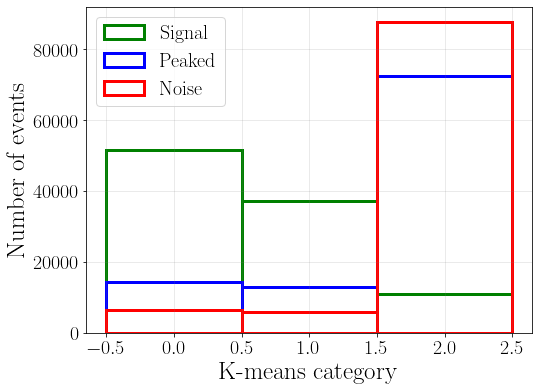

In [13]:
fig, ax = plt.subplots(figsize=(8, 6))
cats = ["S", "P", "N"]

edges = get_edges_from_cats(dataframe_mixed["kmeans"])
for cat in cats:
    dataframe_mixed_cat = dataframe_mixed.query(
        f"{var.dict_df_flags[cat]}==True"
    )
    lp.plot_hist(
        dataframe_mixed_cat["kmeans"],
        "K-means category",
        label=var.dict_df_labels[cat],
        fc=(0, 0, 0, 0),
        edgecolor=var.dict_df_colors[cat],
        ax=ax,
        bins=edges,
        lw=3
    )

ax.legend()

/tmp/ipykernel_1833/1048804858.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['amp_S'] = norm_df['amp_S']


(<Figure size 576x432 with 1 Axes>,
 <AxesSubplot:xlabel='Amplitude', ylabel='Number of events'>)

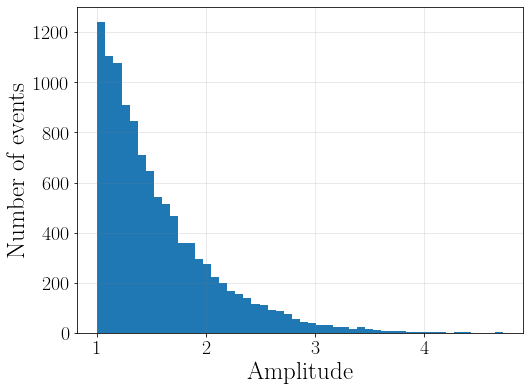

In [15]:
df= dataframe_mixed
df['amp_S'] = norm_df['amp_S']
df = df.query('kmeans == 2').query('is_sig')
lp.plot_hist(df['amp_S'],'Amplitude')


In [16]:
labels = dataframe_mixed["is_sig"] * 1 + dataframe_mixed["is_noise"] * 2 + dataframe_mixed["is_peaked"] * 3

In [17]:
def bench_k_means(kmeans, name, data, labels):
    """Benchmark to evaluate the KMeans initialization methods.

    Parameters
    ----------
    kmeans : KMeans instance
        A :class:`~sklearn.cluster.KMeans` instance with the initialization
        already set.
    name : str
        Name given to the strategy. It will be used to show the results in a
        table.
    data : ndarray of shape (n_samples, n_features)
        The data to cluster.
    labels : ndarray of shape (n_samples,)
        The labels used to compute the clustering metrics which requires some
        supervision.
    """
    t0 = time()
    estimator = make_pipeline(StandardScaler(), kmeans).fit(data)
    fit_time = time() - t0
    results = [name, fit_time, estimator[-1].inertia_]

    # Define the metrics which require only the true labels and estimator
    # labels
    clustering_metrics = [
        metrics.homogeneity_score,
        metrics.completeness_score,
        metrics.v_measure_score,
        metrics.adjusted_rand_score,
        metrics.adjusted_mutual_info_score,
    ]
    results += [m(labels, estimator[-1].labels_) for m in clustering_metrics]

    # The silhouette score requires the full dataset
    results += [
        metrics.silhouette_score(
            data,
            estimator[-1].labels_,
            metric="euclidean",
            sample_size=300,
        )
    ]

    # Show the results
    formatter_result = (
        "{:9s}\t{:.3f}s\t{:.0f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}"
    )
    print(formatter_result.format(*results))

In [20]:
from sklearn.decomposition import PCA
from time import time
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
df = dataframe_mixed[defs.list_columns_samples]

print(82 * "_")
print("init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette")

kmeans = KMeans(init = "k-means++", n_clusters = 3, n_init = 4, random_state = rng.integers(2**32))
bench_k_means(kmeans=kmeans, name="k-means++", data=df, labels=labels)

kmeans = KMeans(init = "random", n_clusters = 3, n_init = 4, random_state = rng.integers(2**32))
bench_k_means(kmeans=kmeans, name="random", data=df, labels=labels)

pca = PCA(n_components = 3).fit(df)
kmeans = KMeans(init = pca.components_, n_clusters = 3, n_init = 1)
bench_k_means(kmeans=kmeans, name="PCA-based", data=df, labels=labels)

print(82 * "_")

AttributeError: module 'project.defs' has no attribute 'list_columns_samples'

In [ ]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=10, min_samples=100)
db = db.fit(dataframe_mixed)
dataframe_mixed['db'] = db.labels_

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
edges = get_edges_from_cats(dataframe_mixed["db"])

for cat in cats[::-1]:
    dataframe_mixed_cat = dataframe_mixed.query(
        f"{models.dict_df_flags[cat]}==True"
    )
    lp.plot_hist(
        dataframe_mixed_cat["db"],
        "DBSCAN category",
        label=var.dict_df_labels[cat],
        color=var.dict_df_colors[cat],
        ax=ax,
        bins=edges,
        lw=3,
        #fc=[0, 0, 0, 0],
        alpha=0.3,
        logscale=True
    )

ax.legend()

In [19]:
df_display = dataframe_mixed.query('db == -1')
lp.plot_hist(df_display['is_sig']*1,'nature')

UndefinedVariableError: name 'db' is not defined